In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from scipy.stats import linregress
import statistics

In [5]:
#data = pd.read_excel("sample_data//Test.xlsx")
#data = pd.read_csv("sample_data//valeursfoncieres-2022.txt",sep="|")
#data = pd.read_excel("Test.xlsx")
data = pd.read_csv("valeursfoncieres-2022.txt",sep="|")
print(data.index)
print(data.columns)
data.drop(['Identifiant de document','Reference document','1 Articles CGI','2 Articles CGI','3 Articles CGI','4 Articles CGI','5 Articles CGI','No disposition'],axis=1, inplace=True)
print(data)

C:\Users\henri\AppData\Local\Temp\ipykernel_21732\1042417931.py:4: DtypeWarning: Columns (18,23,24,26,28,29,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("valeursfoncieres-2022.txt",sep="|")


RangeIndex(start=0, stop=3803885, step=1)
Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')
        Date mutation Nature mutation Valeur fonciere  No voie B/T/

In [21]:
data["Surface terrain"] = data["Surface terrain"].apply(lambda x: str(x).replace(',', '.'))
data["Valeur fonciere"] = data["Valeur fonciere"].apply(lambda x: str(x).replace(',', '.'))

data["Section"] = data["Section"].astype(str)
surfaceterrain = data["Surface terrain"].dropna()
surfaceterrain = surfaceterrain.astype(float)
valeurfonciere = data["Valeur fonciere"].dropna()
valeurfonciere = valeurfonciere.astype(float)
data["PrixFloat"] = data["Valeur fonciere"].astype(float).fillna(0)
data["PrixInt"] = data["PrixFloat"].astype(int)
data["Surface terrain"] = data["Surface terrain"].astype(float)

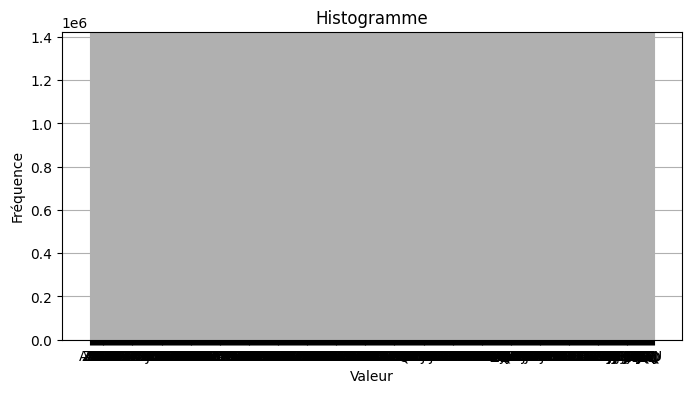

In [7]:
plt.figure(figsize=(8, 4))
plt.hist(data["Section"], bins=30, alpha=0.75, color='blue')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')
plt.title('Histogramme')
plt.grid(True)
plt.show()

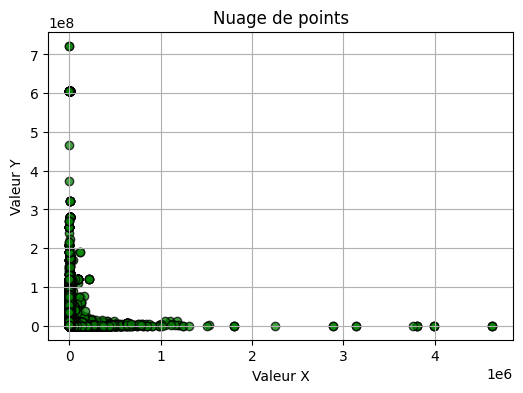

In [112]:
plt.figure(figsize=(6, 4))
plt.scatter(surfaceterrain, valeurfonciere, alpha=0.75, color='green', edgecolors='black')
plt.xlabel('Valeur X')
plt.ylabel('Valeur Y')
plt.title('Nuage de points')
plt.grid(True)
plt.show()

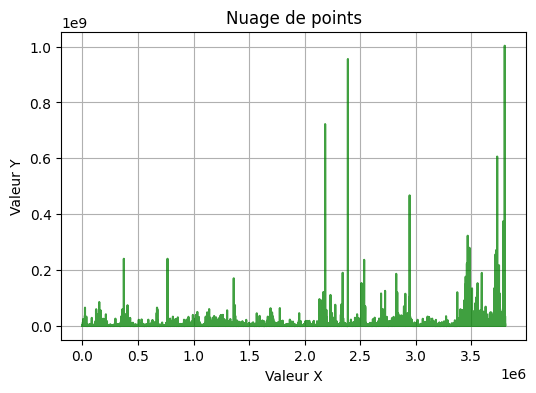

In [111]:
plt.figure(figsize=(6, 4))
plt.plot(valeurfonciere, alpha=0.75, color='green')
plt.xlabel('Valeur X')
plt.ylabel('Valeur Y')
plt.title('Nuage de points')
plt.grid(True)
plt.show()

In [8]:
date = pd.to_datetime(data['Date mutation'], format="%d/%m/%Y")
month = date.dt.month
data["Date"] = date
data["Month"] = month
data["Days"] = date.dt.day
print(month)

0           1
1           1
2           1
3           1
4           1
           ..
3803880    12
3803881    12
3803882    12
3803883    12
3803884    11
Name: Date mutation, Length: 3803885, dtype: int64


In [9]:
data.sort_values(by='Date', inplace=True)
print(data)

        Date mutation                     Nature mutation Valeur fonciere  \
1490099    01/01/2022                               Vente             nan   
1490102    01/01/2022                               Vente             nan   
1490101    01/01/2022                               Vente             nan   
1490100    01/01/2022                               Vente             nan   
1490098    01/01/2022                               Vente             nan   
...               ...                                 ...             ...   
921434     31/12/2022                               Vente       150000.00   
996010     31/12/2022                               Vente       159000.00   
996011     31/12/2022                               Vente       159000.00   
510535     31/12/2022                               Vente       390000.00   
1444968    31/12/2022  Vente en l'état futur d'achèvement       262000.00   

         No voie B/T/Q Type de voie Code voie                        Voie  

In [10]:
coefficients = np.polyfit(data["PrixInt"], data["Days"], 1)
print(coefficients)
polynome = np.poly1d(coefficients)
print(polynome)
# Générer la ligne de régression linéaire à partir des coefficients
y_regression = polynome(data["PrixInt"])


#CALCUL DE L'ERREUR
def Calculderreur(polynome):
    somme = 0 
    for i in range(len(data["PrixInt"])):
        somme += (data['PrixInt'][i]-polynome(data["Days"][i]))**2
    somme /= len(data["Days"])
    return somme
print(Calculderreur(polynome))
print(Calculderreur(np.poly1d([2,10])))
plt.plot(data["Days"], y_regression, color='red')
plt.scatter(data["Days"],data["PrixInt"])
plt.show()

[3.03904044e-08 1.65592290e+01]
 
3.039e-08 x + 16.56


KeyboardInterrupt: 

In [11]:
print("Prix moyen : ",data["PrixInt"].mean())
departement = data["Code departement"].drop_duplicates()
print("Liste des département : ",departement)
for i in departement:
    listedesprix = []
    for j in range(len(data["Code departement"])):
      if(str(data["Code departement"][j]) == str(i)):
        listedesprix.append(data["PrixFloat"][j])
    print("Prix moyen pour le département "+str(i)+" : ",statistics.mean(listedesprix))


Prix moyen :  699681.5910249653
Liste des département :  1490099    39
510814     17
1905730    49
3273693    87
2417510    65
           ..
569004     18
3232872    86
256167      9
2367843    63
919807     29
Name: Code departement, Length: 99, dtype: object
Prix moyen pour le département 39 :  148267.81606555945
Prix moyen pour le département 17 :  268133.60665172513
Prix moyen pour le département 49 :  266105.1622325162
Prix moyen pour le département 87 :  145028.36897335146
Prix moyen pour le département 65 :  462948.1763945542
Prix moyen pour le département 1 :  320872.02829383756
Prix moyen pour le département 94 :  1308619.407109753
Prix moyen pour le département 38 :  266882.7533724544
Prix moyen pour le département 5 :  541602.0325491892
Prix moyen pour le département 95 :  596600.0391907515
Prix moyen pour le département 92 :  3958266.450586202
Prix moyen pour le département 45 :  330486.9896554261
Prix moyen pour le département 73 :  378457.613914317
Prix moyen pour le dépa

KeyboardInterrupt: 

In [14]:
def average_price_by_road_type(dept_data):
    # Sélectionner les 5 types de voie les plus fréquents
    top_5_road_types = dept_data['Type de voie'].value_counts().nlargest(5).index

    # Filtrer les données pour inclure uniquement les 5 types de voie les plus fréquents
    filtered_dept_data = dept_data[dept_data['Type de voie'].isin(top_5_road_types)]

    # Calculer les prix moyens pour les 5 types de voie les plus fréquents
    average_prices = filtered_dept_data.groupby('Type de voie')['PrixFloat'].mean()
    return average_prices

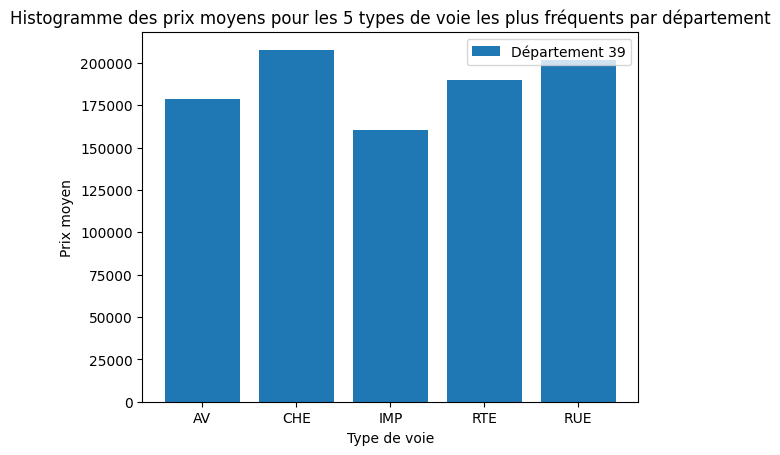

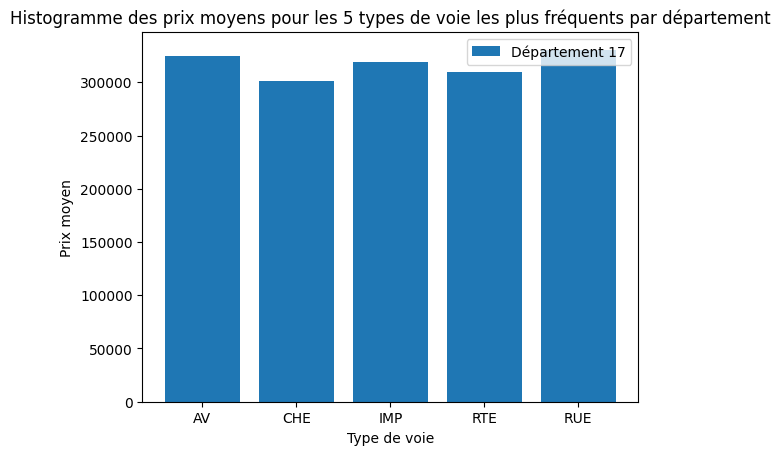

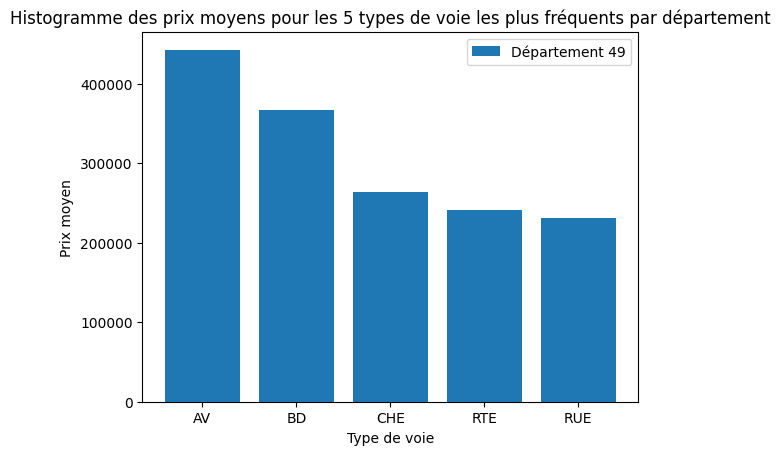

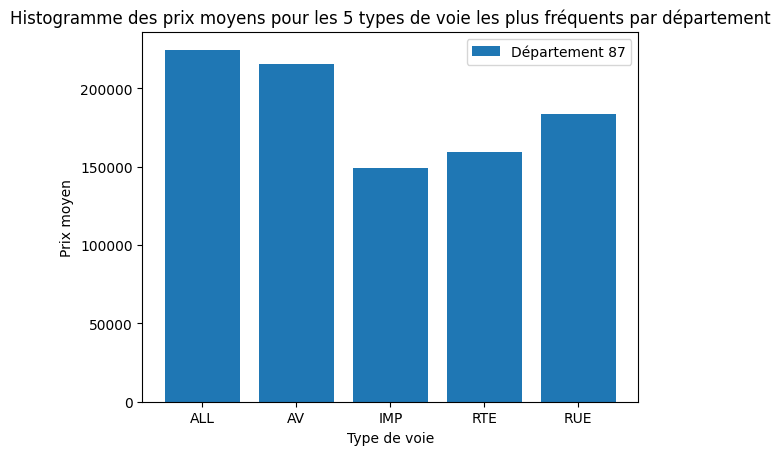

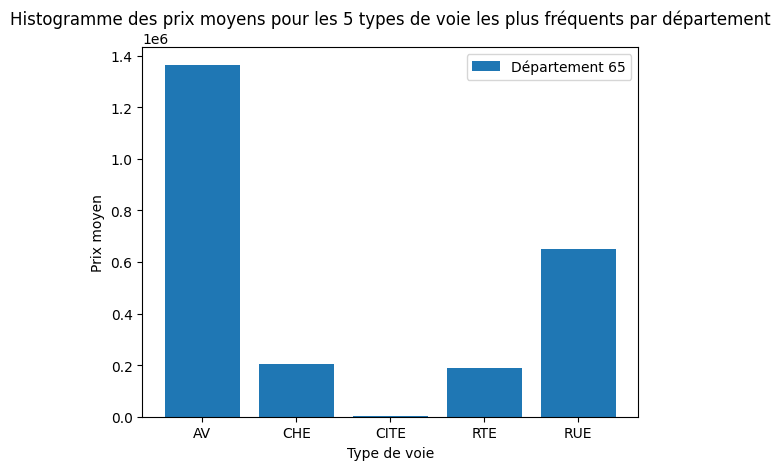

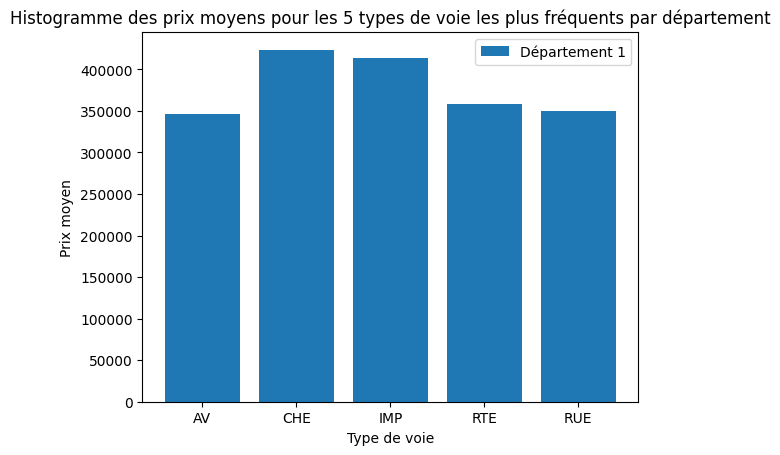

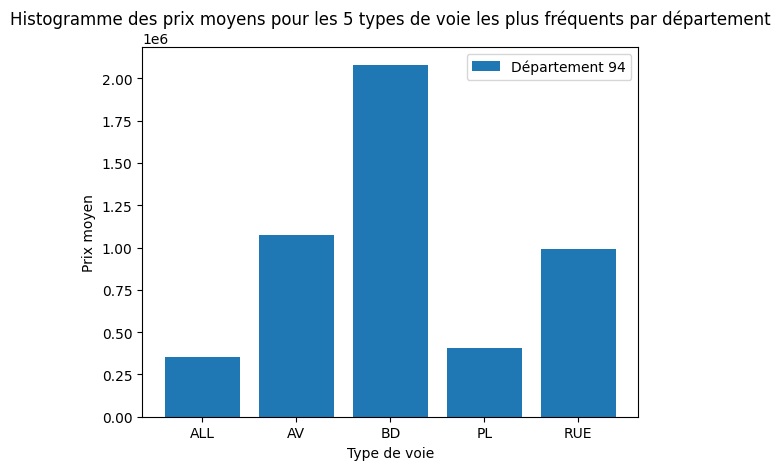

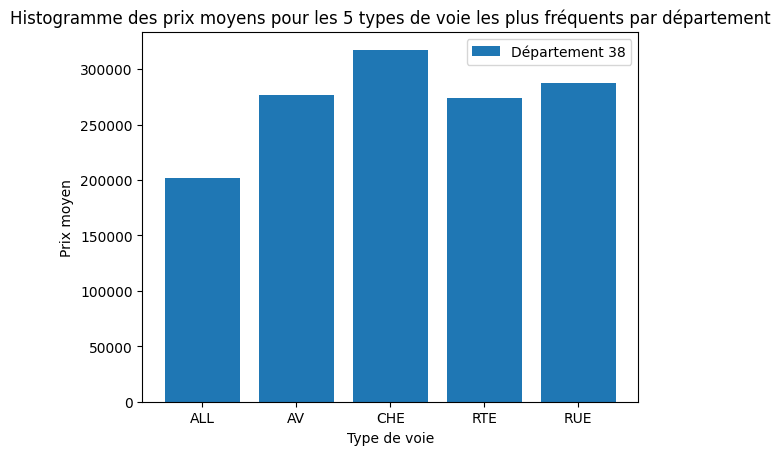

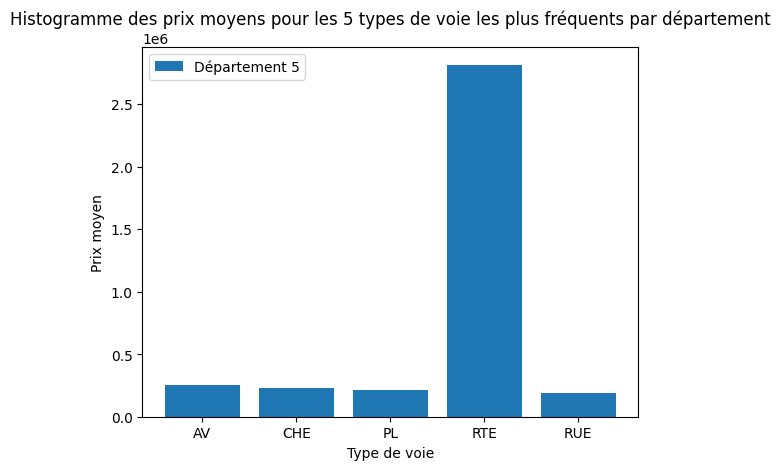

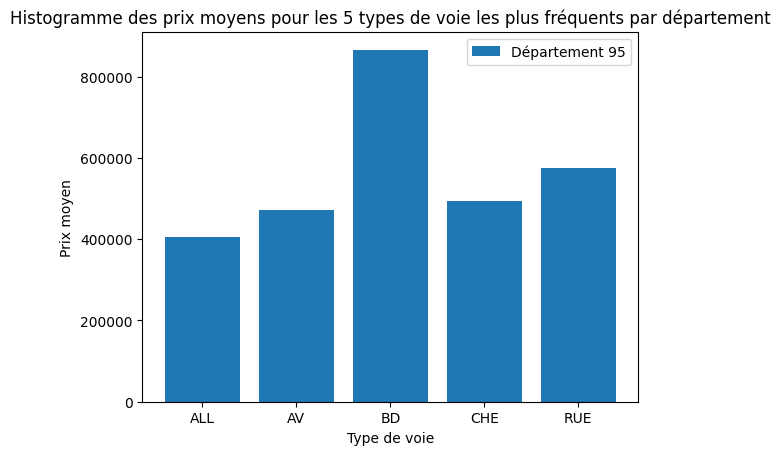

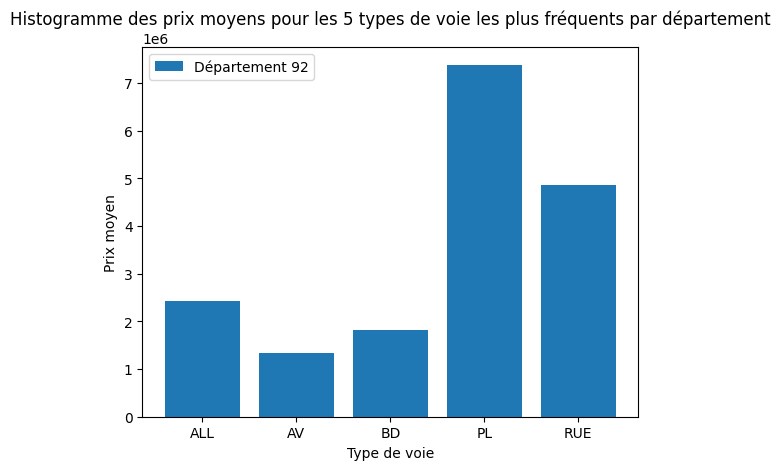

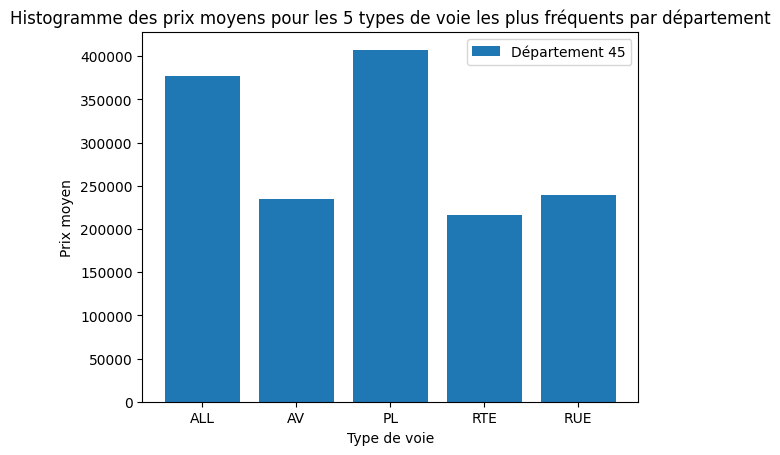

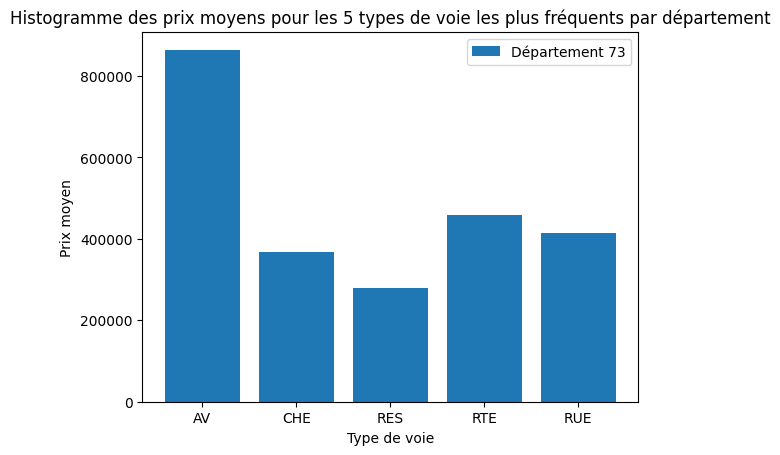

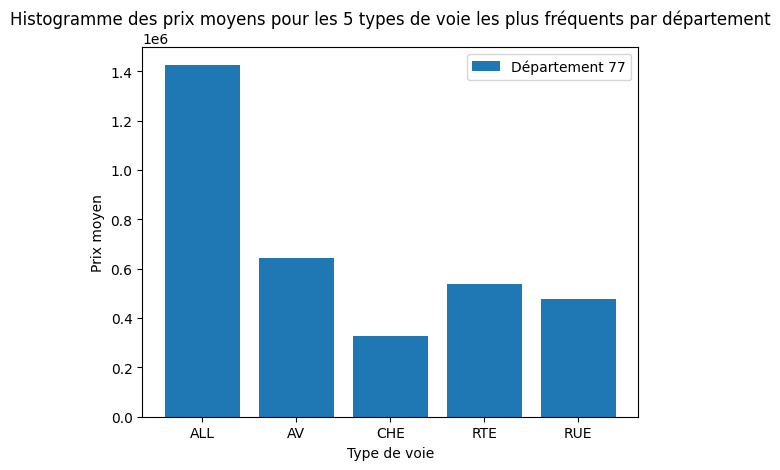

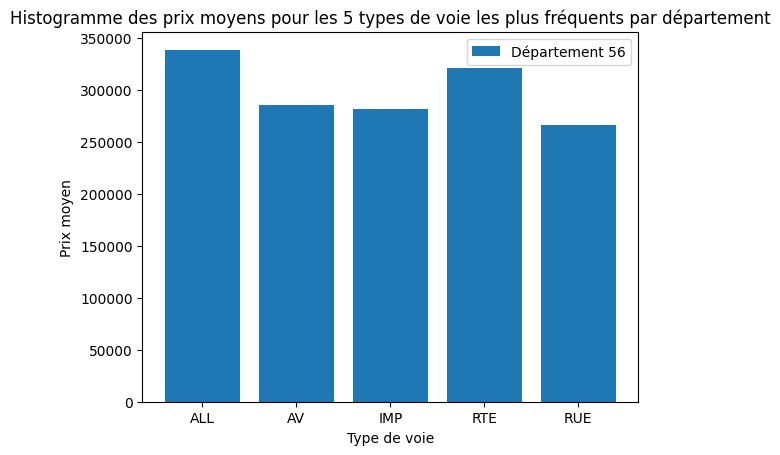

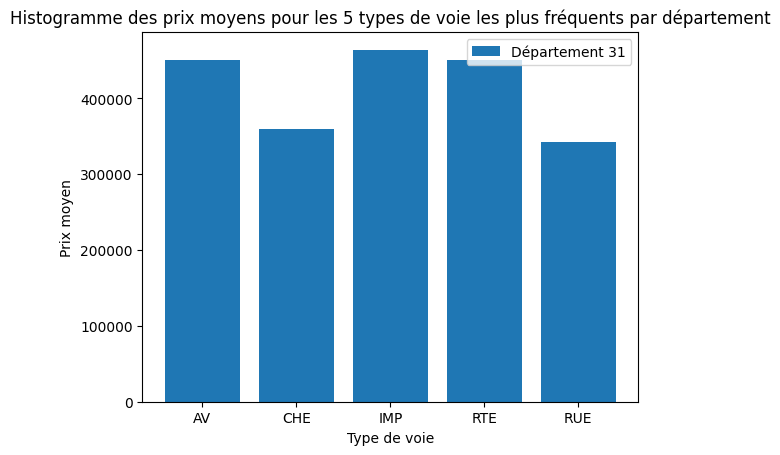

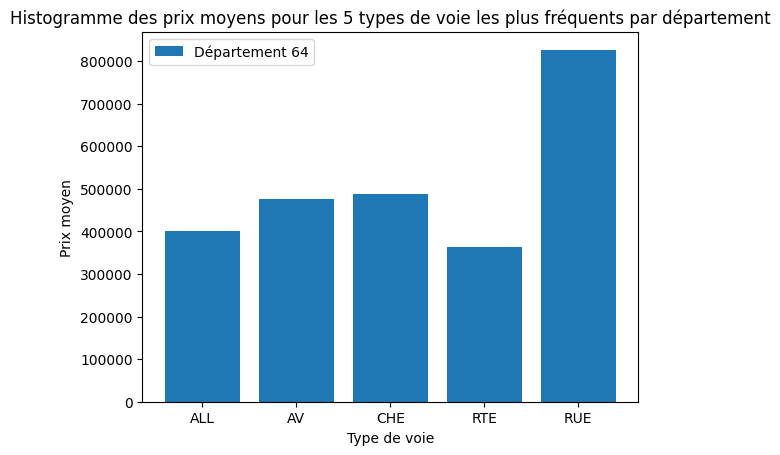

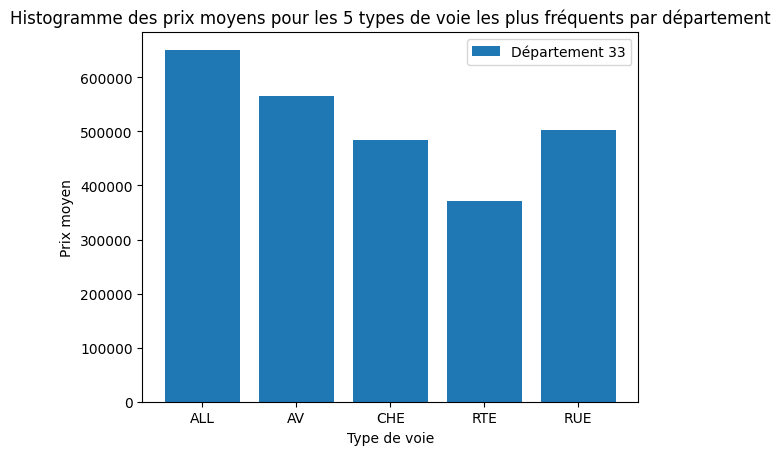

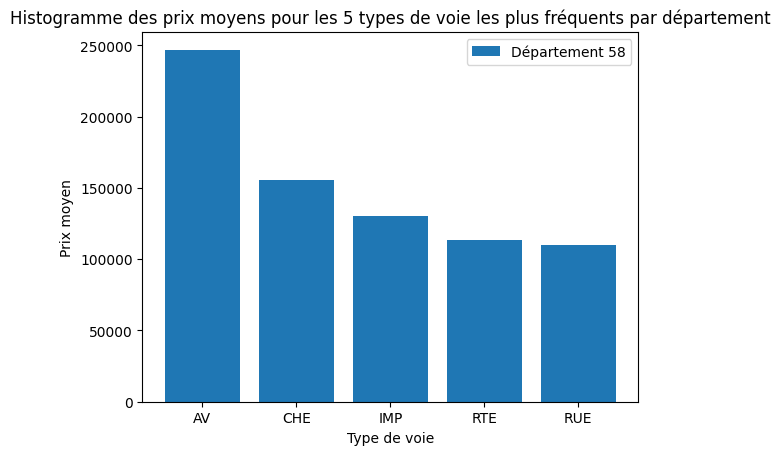

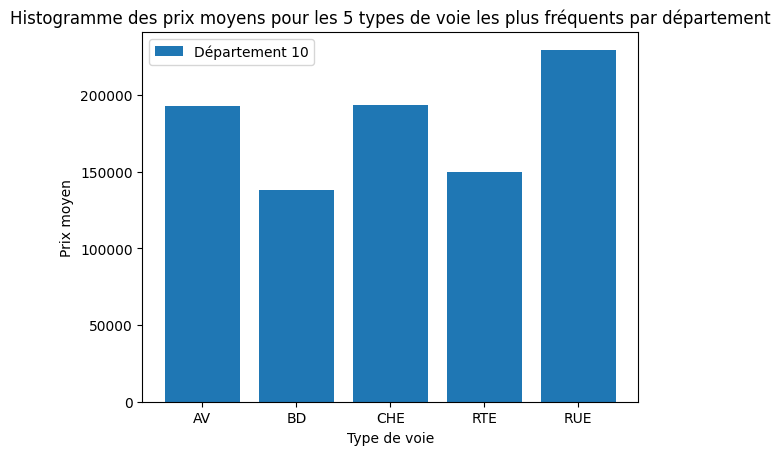

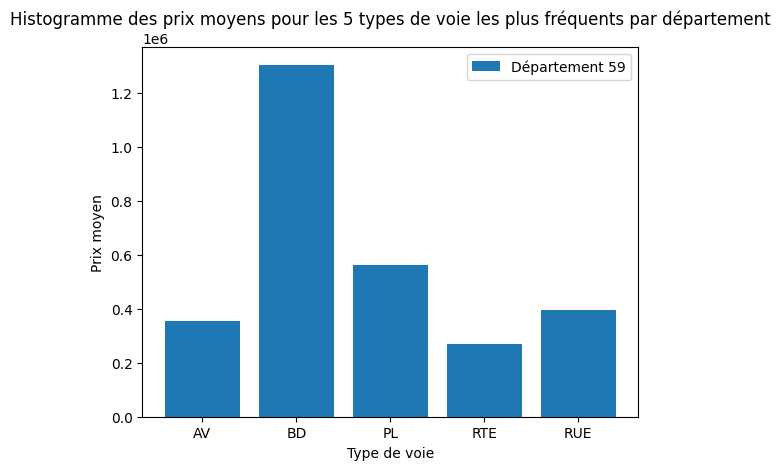

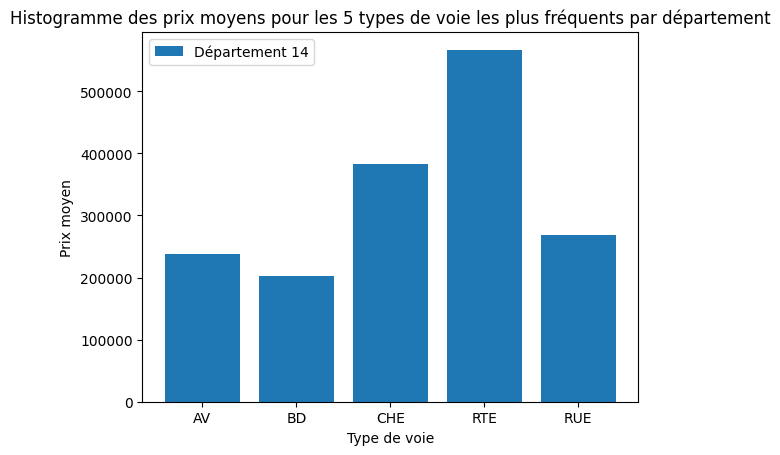

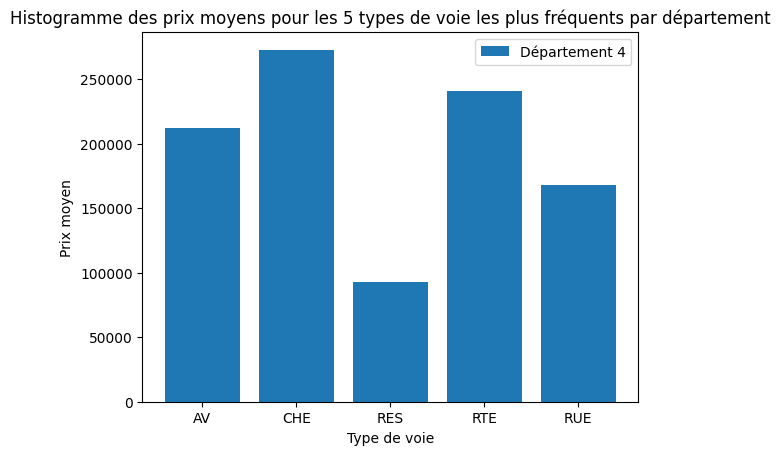

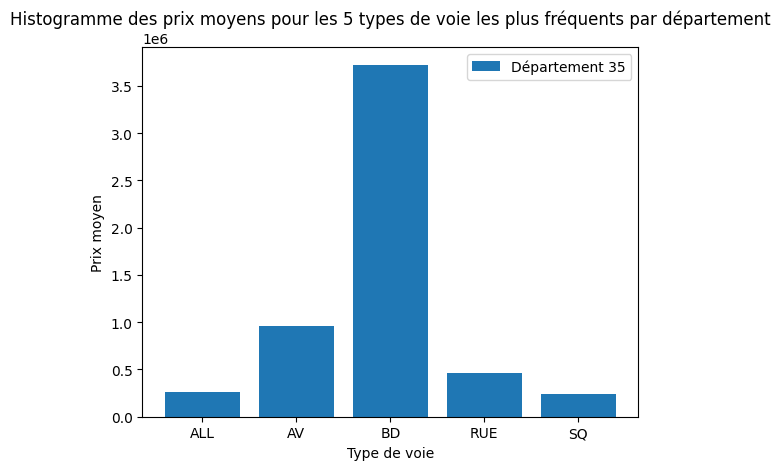

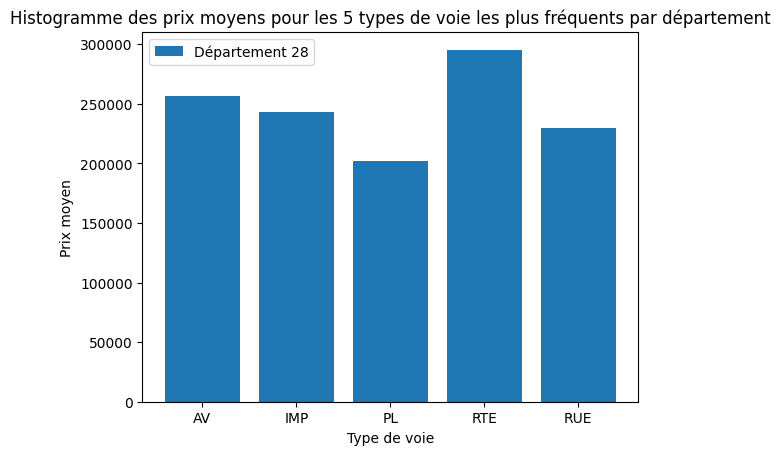

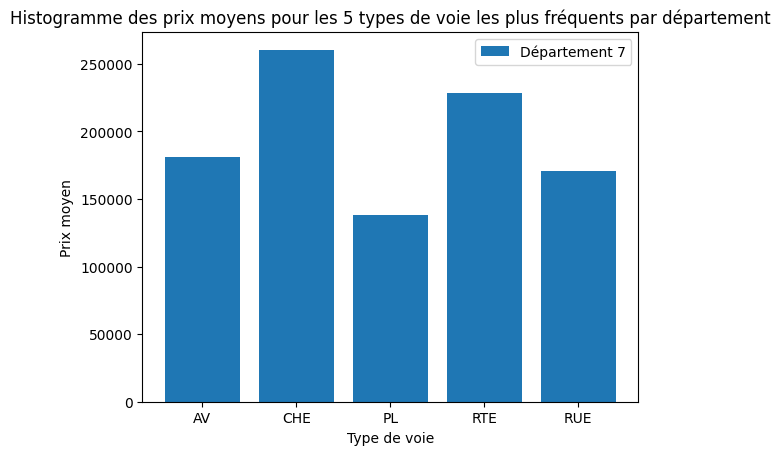

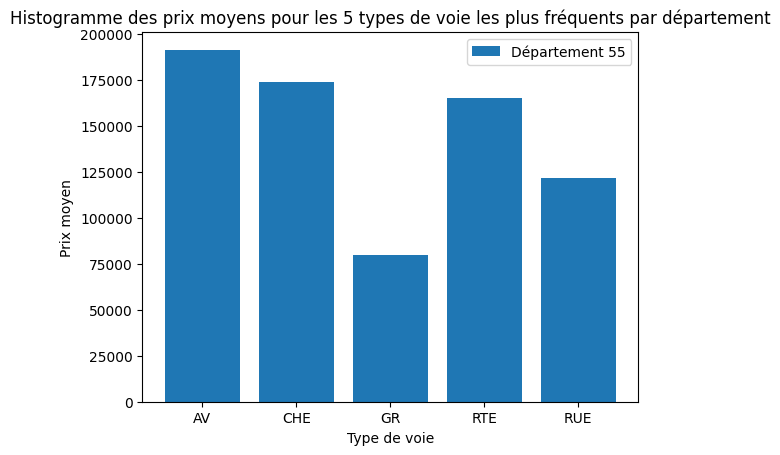

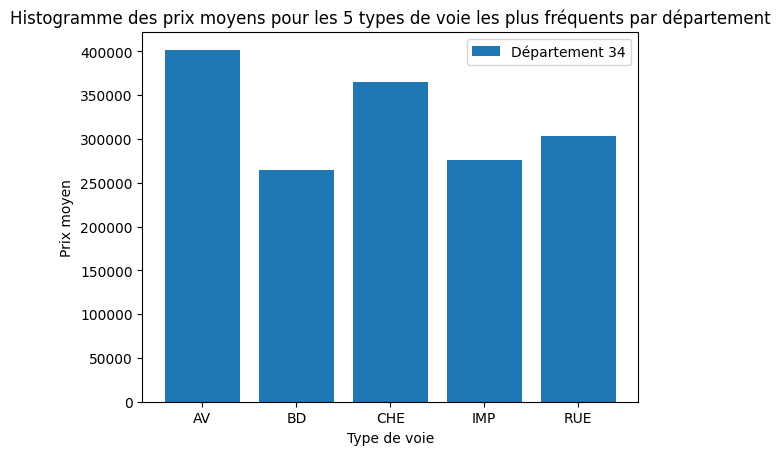

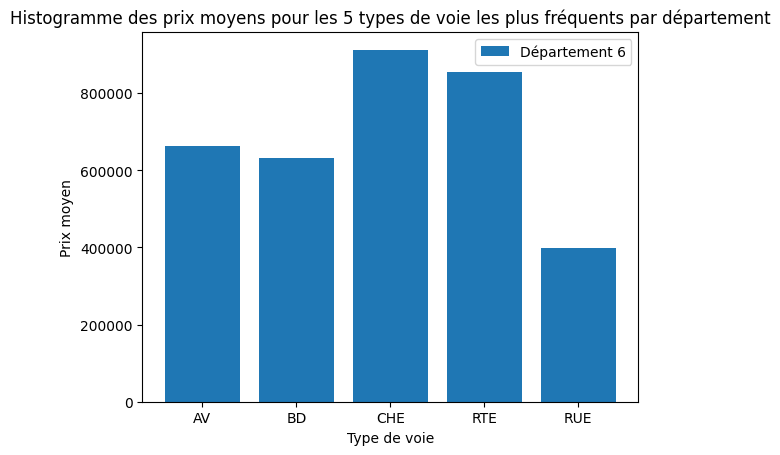

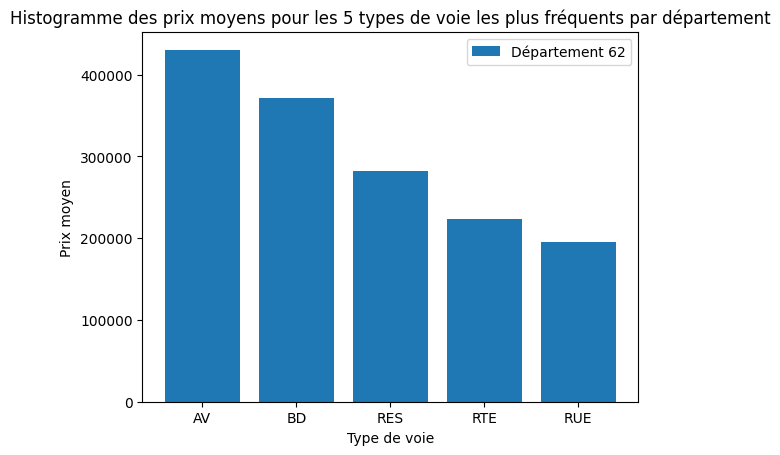

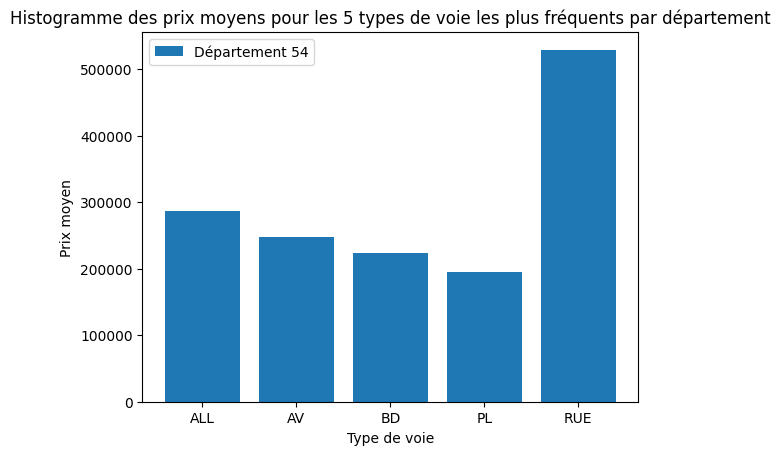

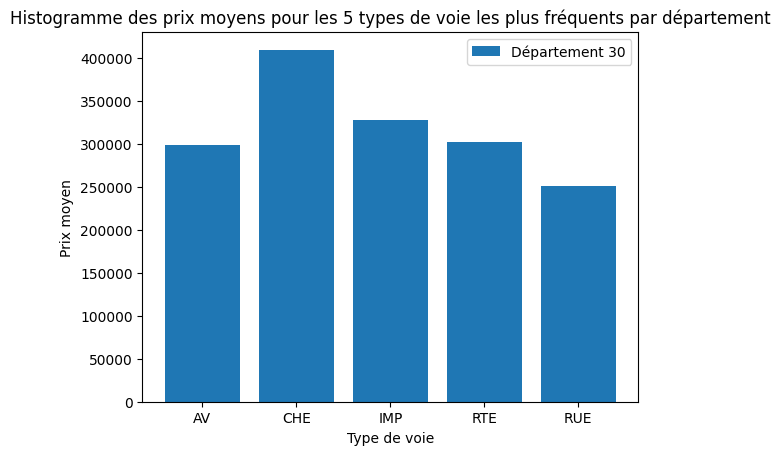

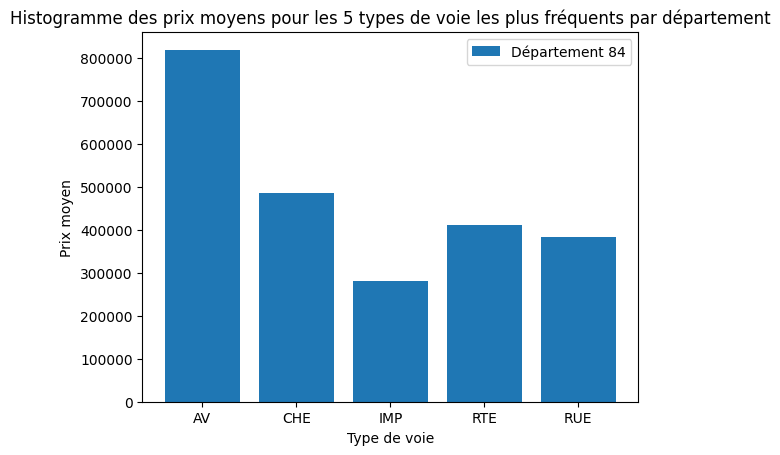

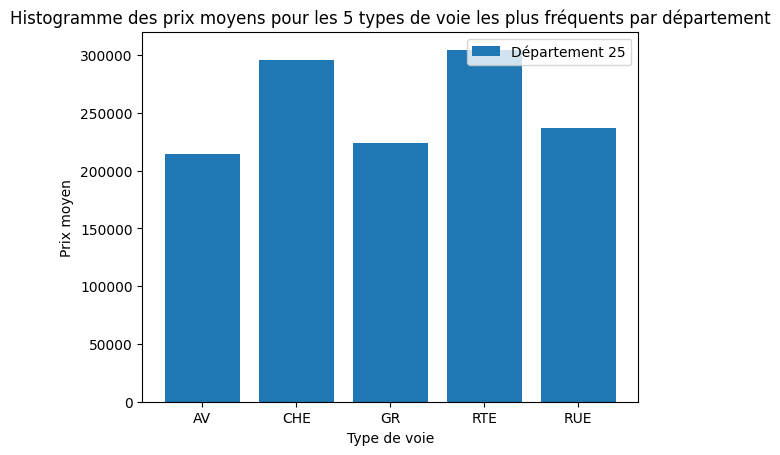

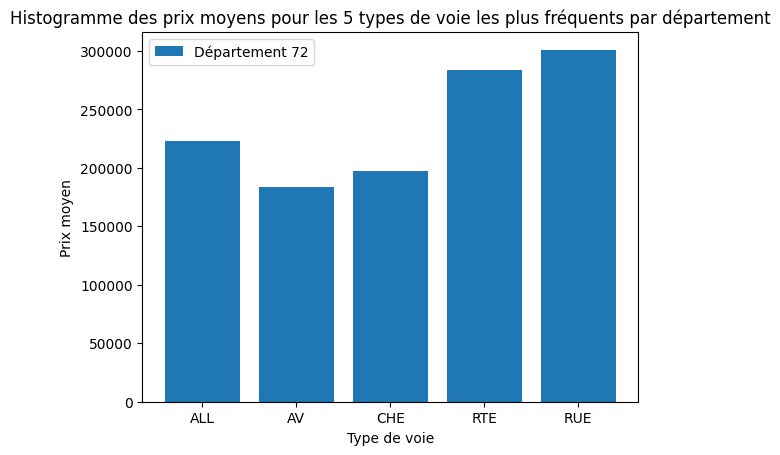

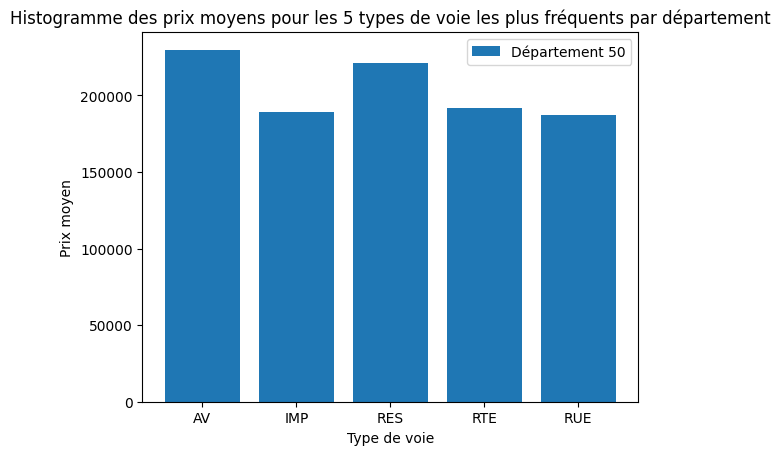

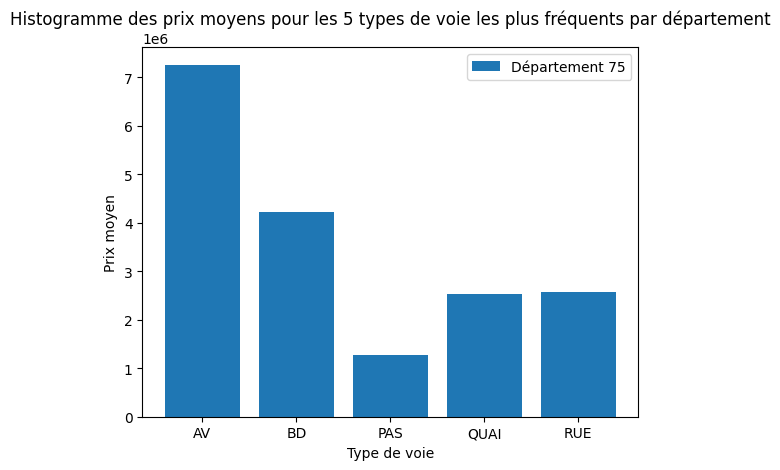

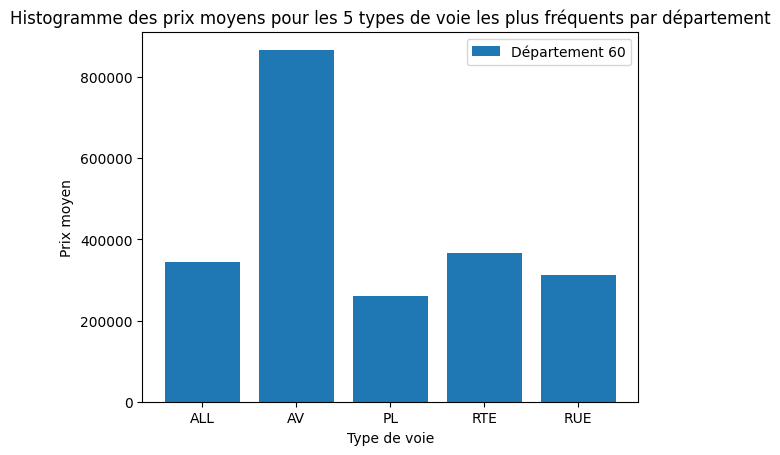

ValueError: invalid literal for int() with base 10: '2A'

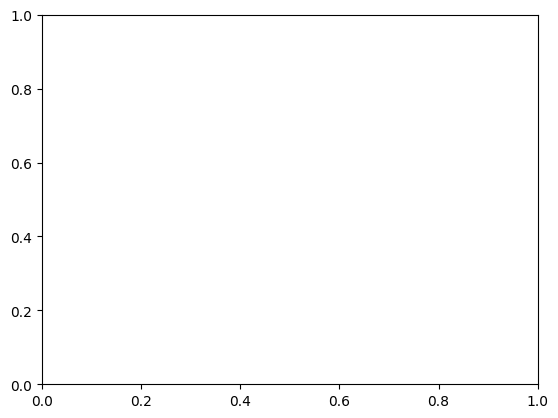

In [15]:
# Parcourir chaque département et tracer l'histogramme des prix moyens par type de voie
for j in departement:
    fig, ax = plt.subplots()
    dept_data = data[data['Code departement'] == int(j)]
    average_prices = average_price_by_road_type(dept_data)
    
    # Tracer l'histogramme des prix moyens pour le département actuel
    ax.bar(average_prices.index, average_prices, label=f'Département {j}')

    # Configurer les étiquettes des axes et le titre
    ax.set_xlabel("Type de voie")
    ax.set_ylabel("Prix moyen")
    ax.set_title("Histogramme des prix moyens pour les 5 types de voie les plus fréquents par département")

    # Ajouter une légende
    ax.legend()

    # Afficher le graphique
plt.show()

{'Dépendance': 7213.520197856554, 'Appartement': 19920.3187250996, 'Local industriel. commercial ou assimilé': 34403.66972477064, 'Maison': 18305.083406496928}


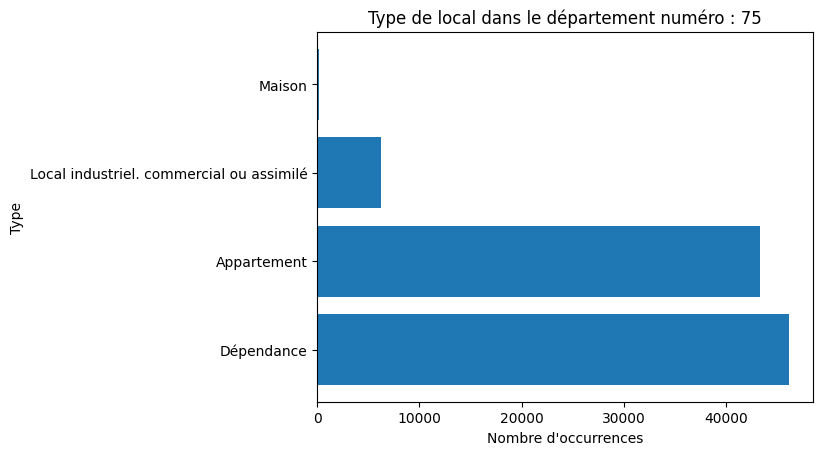

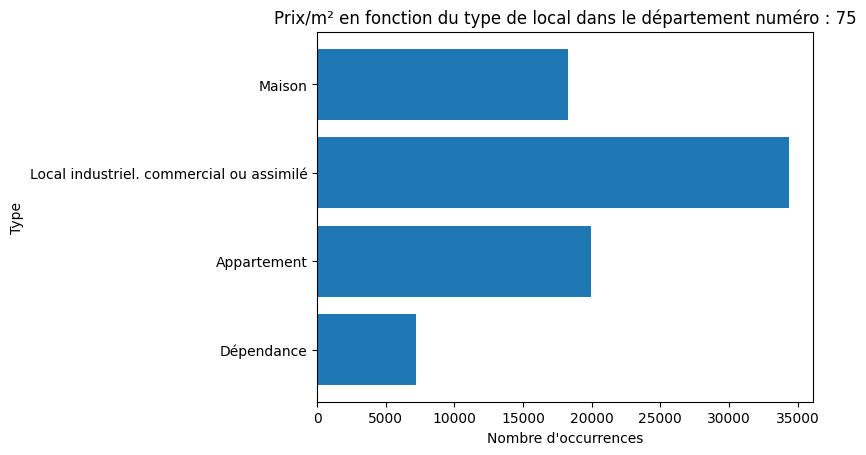

{'Dépendance': 1061.7909483204135, 'Appartement': 1921.0526315789473, 'Maison': 1105.4442935779816, 'Local industriel. commercial ou assimilé': 1104.2944785276075}


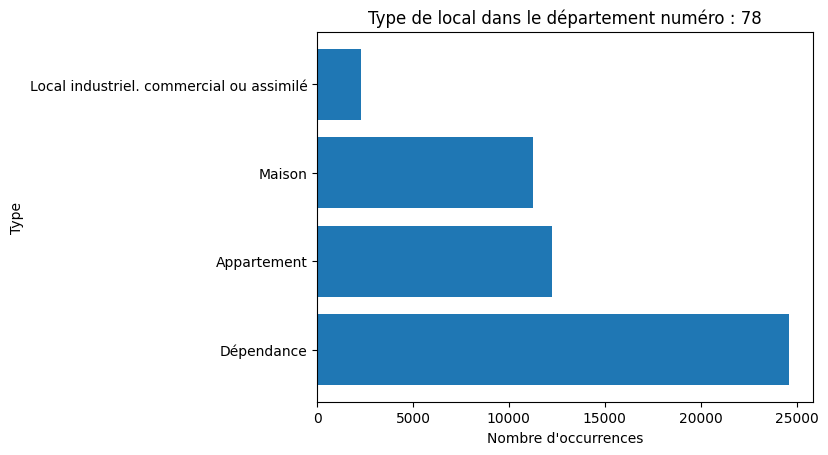

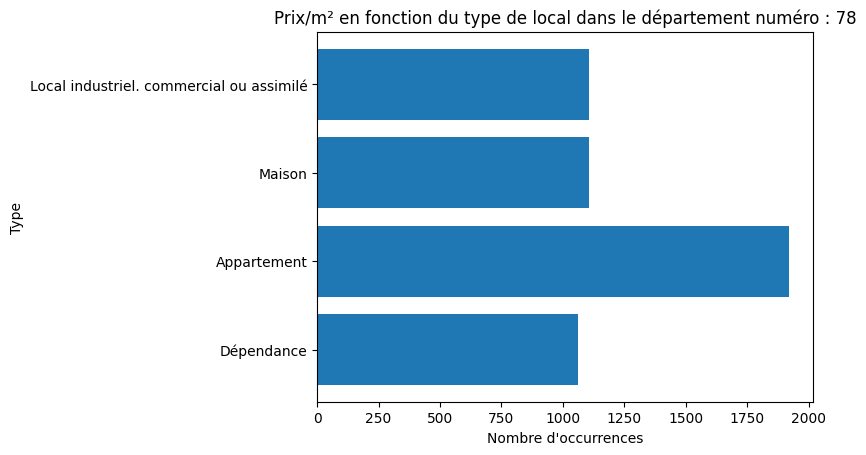

{'Dépendance': 4267.235168631388, 'Appartement': 8543.080768058519, 'Local industriel. commercial ou assimilé': 8582.834331337326, 'Maison': 3394.4487130234347}


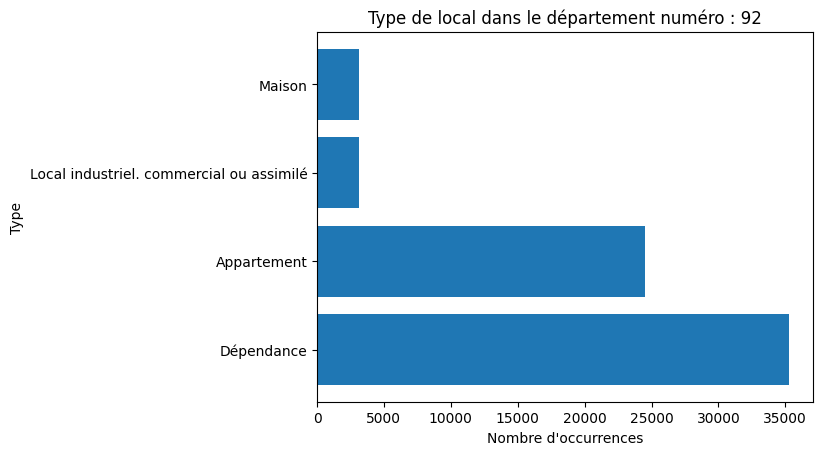

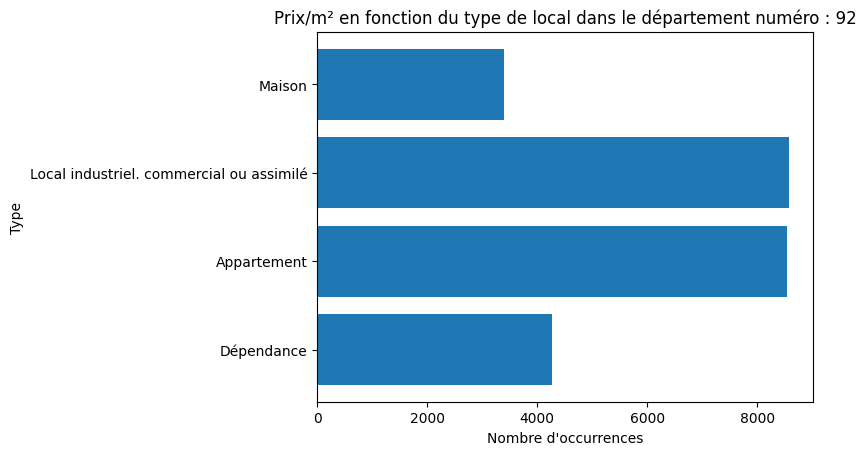

In [26]:
departement = [75,78,92]
data["Prix/m2"] = data["PrixInt"]/data["Surface terrain"]
for j in departement:
    dept_data = data[data['Code departement'] == int(j)]
    type_counts = dept_data["Type local"].value_counts()
    type_counts_dict = type_counts.to_dict()
    fig, ax = plt.subplots()
    prixenfonctiondulocal = {}
    for u in type_counts_dict.keys():
        dept_datatype = dept_data[dept_data['Type local'] == str(u)]
        prixenfonctiondulocal[u] = dept_datatype["Prix/m2"].median()
    print(prixenfonctiondulocal)
    ax.barh(list(type_counts_dict.keys()), list(type_counts_dict.values()))
    ax.set_xlabel("Nombre d'occurrences")
    ax.set_ylabel("Type")
    ax.set_title("Type de local dans le département numéro : "+str(j))
    plt.show()
    fig, ax = plt.subplots()
    ax.barh(list(prixenfonctiondulocal.keys()), list(prixenfonctiondulocal.values()))
    ax.set_xlabel("Nombre d'occurrences")
    ax.set_ylabel("Type")
    ax.set_title("Prix/m² en fonction du type de local dans le département numéro : "+str(j))
    plt.show()